# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Problem
We want to determine what drives the sales prices of our used cars. Fortunately, we have access to a comprehensive database of 426k vehicles that gives us actual customer and vehicle data on vehicles that have been sold. We can utilize this nationwide information to help us more clearly understand what are the main drivers of vehicle price, both positive drivers and negative drivers. For this project we will examine the data using modern data mining techniques and data modeling analysis to access the price drivers. We will then provide a list of recommendations for our chain of used car dealerships and their salespersons to improve our overall total sales volumn and profit margins. 

## Data Understanding
We will begin by taking a look at the provided used car database to understand the detail and breath of information we have to analyze. The basic process is as follows:
1. Load in dataset (vehicles.csv)
2. Examine the overall data to see what data is available to be used as features and how clean the dataset is. 
3. Visualize the data to get an overall understanding. We can do this by plotting data as follows:
- Examine the price range of used cars

### Initial Conclusions
- The feature set includes 18 features which is a very reasonable size. Therefore, we can consider all the features in our analysis.
- Price is the defined target. Id probably isn't relavent. So that leaves us with 16 features of primary interest. 
- Location is captured in both region and state. Initially, we will keep both, but expect to be able to drop the state in our final analysis as the region should be the focus for our used car dealerships. 

#### Import libraries needed for the entire project

In [44]:
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


In [2]:
vehicles = pd.read_csv('data/vehicles.csv')
df = vehicles.copy()

In [3]:
vehicles.info()
vehicles.head()
vehicles.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [14]:
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

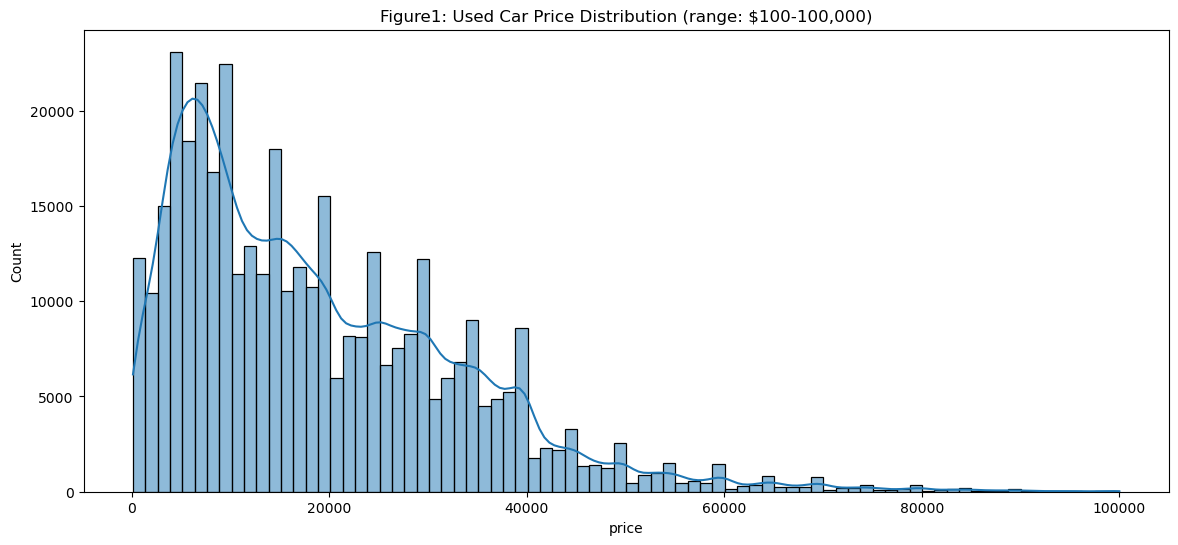

In [ ]:
# clean the data to get rid of outliers (<$100 and >$100,000)
df_clean = df[(df['price'] > 100) & (df['price'] < 100000)] 

# Figure 1: used car price distribution
plt.figure(figsize=(14, 6))
sns.histplot(df_clean['price'], bins=80, kde=True)
plt.title("Figure 1: Used Car Price Distribution (range: $100-100,000)")
plt.show()



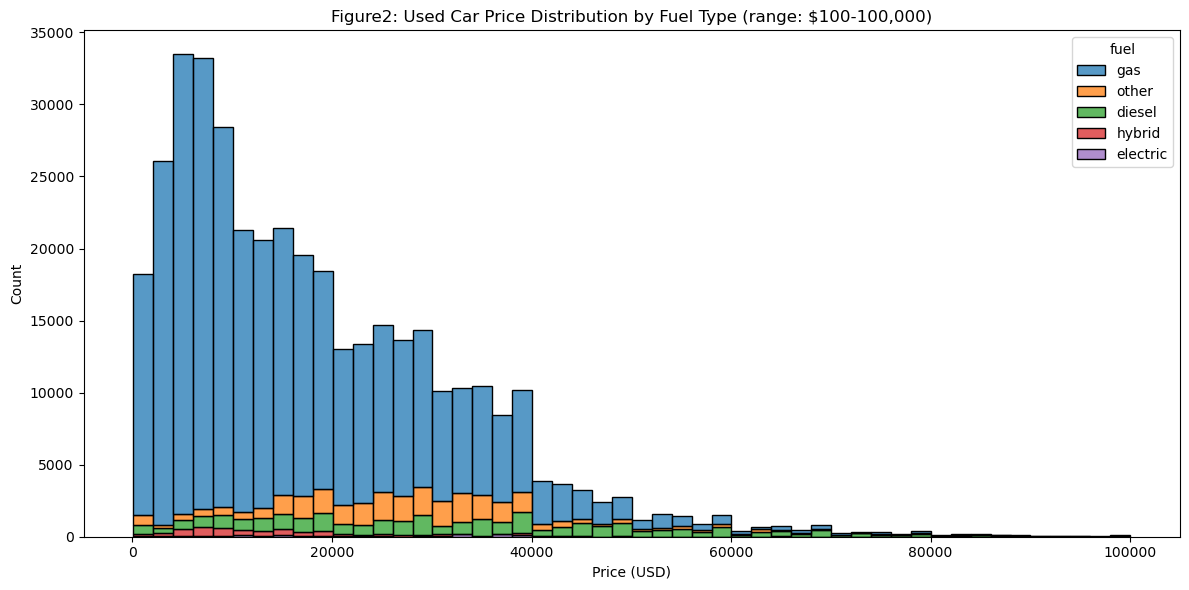

In [ ]:
# Figure 2: Used car price distribution by fuel type

# Filter data for valid prices and fuel types
df_eng = df.loc[df['price'].between(100, 100_000) & df['fuel'].notna()]

# Simple histogram by fuel type
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_eng,
    x='price',
    hue='fuel',
    bins=50,
    multiple='stack'
)

plt.title("Figure 2: Used Car Price Distribution by Fuel Type (range: $100-100,000)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [4]:
# Let' get the total counts for each fuel type

print("Vehicles sold by Fuel Type")
gas_count = (df['fuel'] =="gas").sum()
gas_ratio = gas_count / df['fuel'].notna().sum() *100
print(f"gas: {gas_count} ({gas_ratio:.1f}%)")

diesel_count = (df['fuel'] =="diesel").sum() 
diesel_ratio = diesel_count / df['fuel'].notna().sum() * 100
print(f"diesel: {diesel_count} ({diesel_ratio:.1f}%)")

hybrid_count = (df['fuel'] =="hybrid").sum()
hybrid_ratio = hybrid_count / df['fuel'].notna().sum() *100
print(f"hybrid: {hybrid_count} ({hybrid_ratio:.1f}%)")

electric_count = (df['fuel'] =="electric").sum()
electric_ratio = electric_count / df['fuel'].notna().sum() *100
print(f"electric: {electric_count} ({electric_ratio:.1f}%)")

other_count = (df['fuel'] =="other").sum()
other_ratio = other_count / df['fuel'].notna().sum() *100
print(f"other: {other_count} ({other_ratio:.1f}%)")



Vehicles sold by Fuel Type
gas: 356209 (84.0%)
diesel: 30062 (7.1%)
hybrid: 5170 (1.2%)
electric: 1698 (0.4%)
other: 30728 (7.2%)


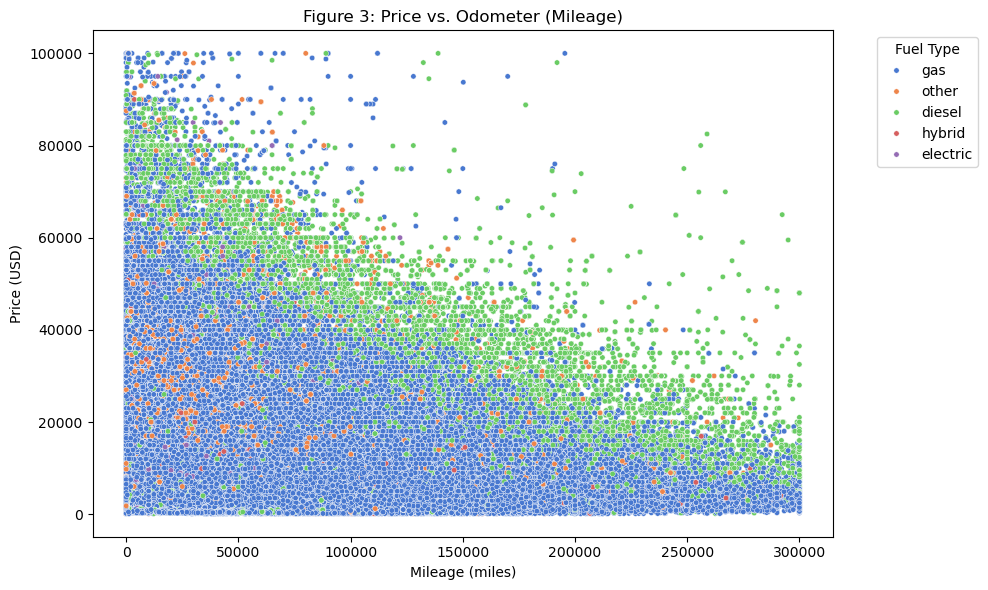

In [208]:
# Figure 3: Used car price distribution vs mileage scatterplot

# Filter for reasonable ranges
df_mileage = df.loc[
    df['price'].between(100, 100_000) &
    df['odometer'].between(0, 300_000) &
    df['odometer'].notna()
]

# Simple scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_mileage,
    x='odometer',
    y='price',
    hue='fuel',
    palette="muted",
    alpha=1, s=15
)

plt.title("Figure 3: Price vs. Odometer (Mileage)")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (USD)")
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


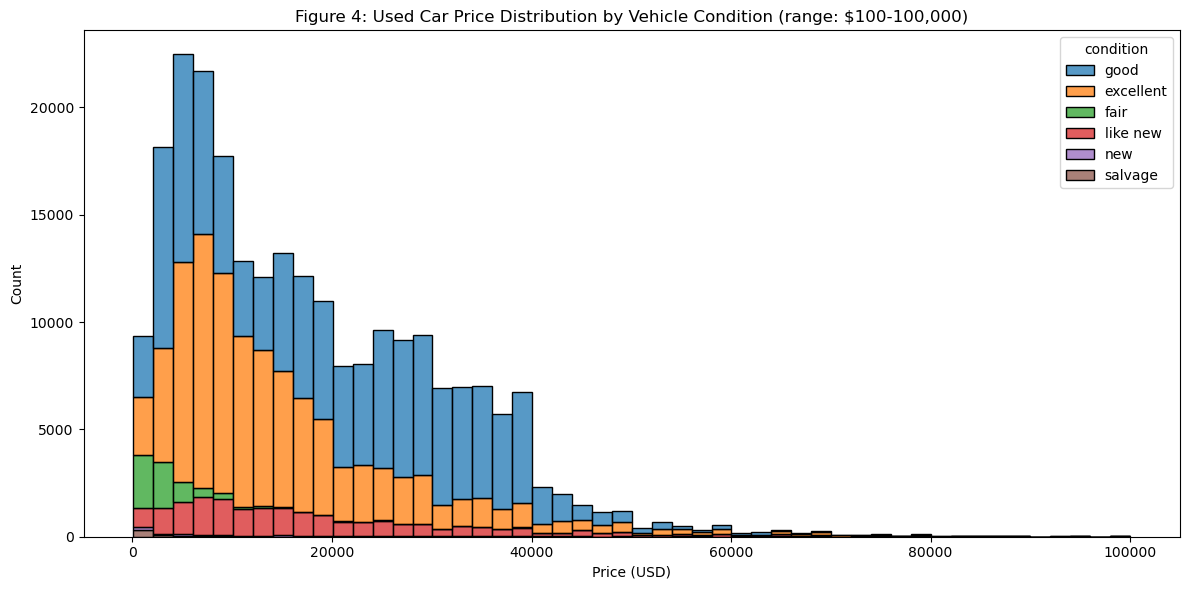

In [97]:
# Figure 4: Used car price distribution by vehicle condition

# Filter data for valid prices and fuel types
df_cond = df.loc[df['price'].between(100, 100_000) & df['condition'].notna()]

# Simple histogram by fuel type
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_cond,
    x='price',
    hue='condition',
    bins=50,
    multiple='stack'
)

plt.title("Figure 4: Used Car Price Distribution by Vehicle Condition (range: $100-100,000)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

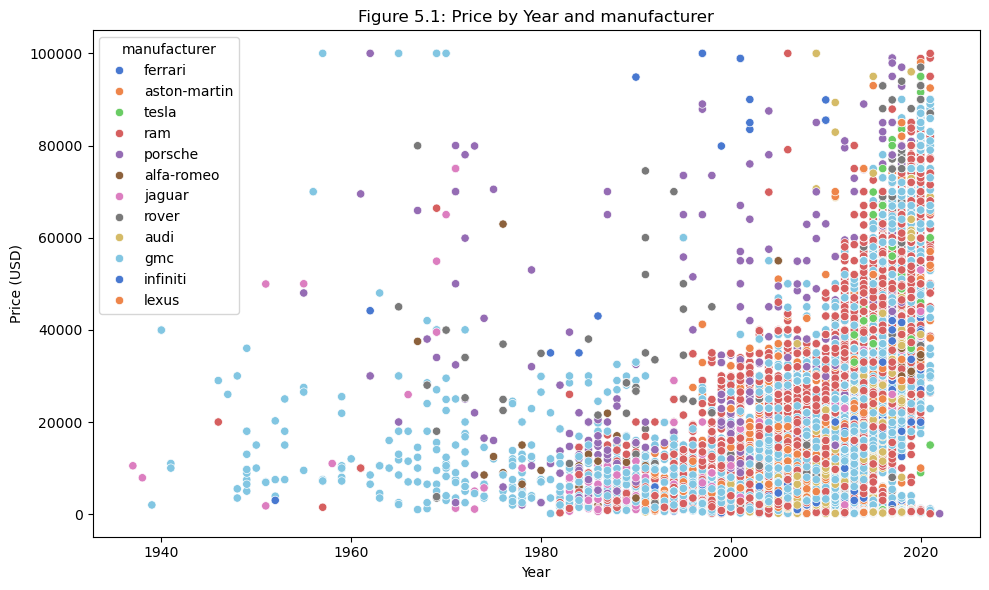

In [224]:
# Figure 5.1: Used car price vs manufactuerer and year (indicates top brands)

# Filter for reasonable ranges
df_brands = df.loc[
    df['price'].between(100, 100_000) &
    df['year'].notna()&
    df['manufacturer'].notna()
]

# Let's pick the top brands 
top_brands = (df_brands.groupby('manufacturer')['price']
              .median() # select the average sales price
              .sort_values(ascending=False)
              .head(12)  # select the number of brands
              .index.to_list()
)

# Simple scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_mileage[df_mileage['manufacturer'].isin(top_brands)],
    x='year',
    y='price',
    hue='manufacturer', 
    hue_order=top_brands,
    palette="muted",
    alpha=1.0,
)

plt.title("Figure 5.1: Price by Year and manufacturer")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()


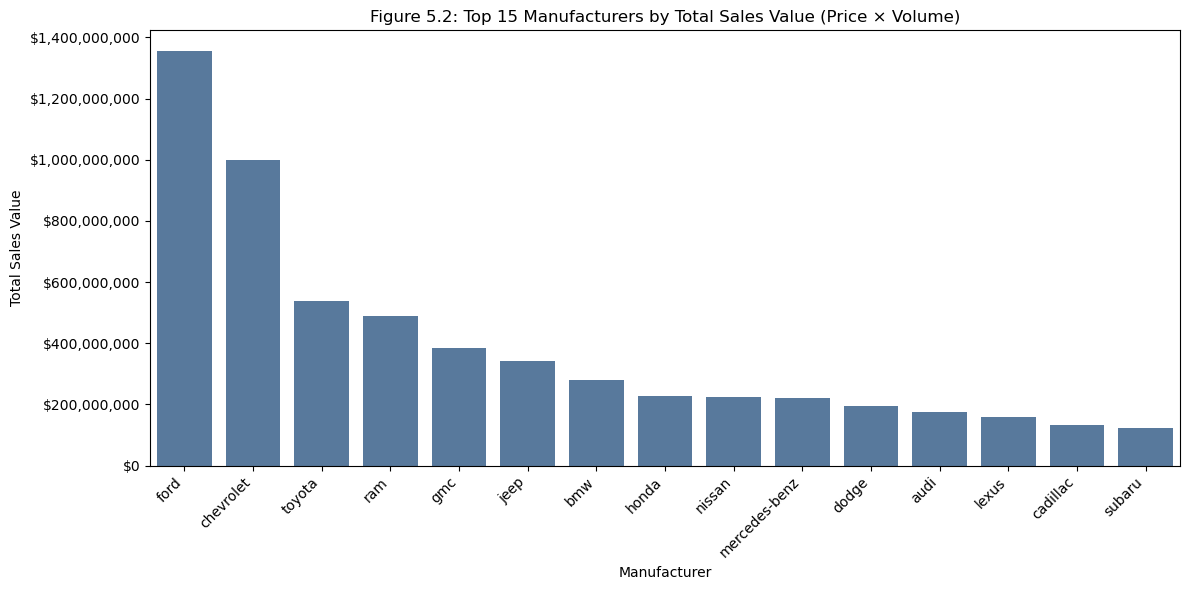

In [223]:
# Figure 5.2 - Top brands by total sales (volume * price)

# some light cleaning 
df_brand = df.loc[
    df['price'].between(100, 100_000) &
    df['manufacturer'].notna()
].copy()

# overall brand value by sales volume * price
brand_value = (
    df_brand.groupby('manufacturer')['price']
      .agg(total_value='sum', volume='count', median_price='median')
      .sort_values('total_value', ascending=False)
      .head(15)                         # top N brands by total value
      .reset_index()
)

# plot 
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=brand_value,
    x='manufacturer', y='total_value',
    order=brand_value['manufacturer'],
    color='#4C78A8'
)

# currency axis + labels
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
plt.title("Figure 5.2: Top 15 Manufacturers by Total Sales Value (Price × Volume)")
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


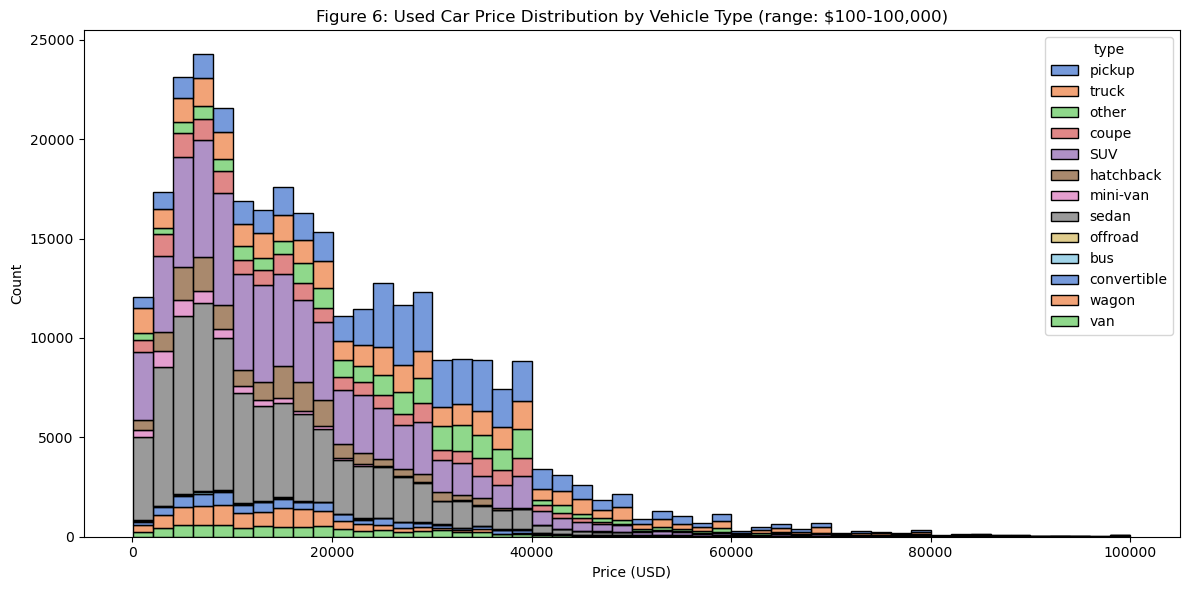

In [228]:
# Figure 6: Used car price distribution by vehicle type

# Filter data for valid prices and fuel types
df_cond = df.loc[df['price'].between(100, 100_000) & df['type'].notna()]

# Simple histogram by fuel type
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_cond,
    x='price',
    hue='type',
    bins=50,
    multiple='stack',
    palette="muted"
)

plt.title("Figure 6: Used Car Price Distribution by Vehicle Type (range: $100-100,000)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

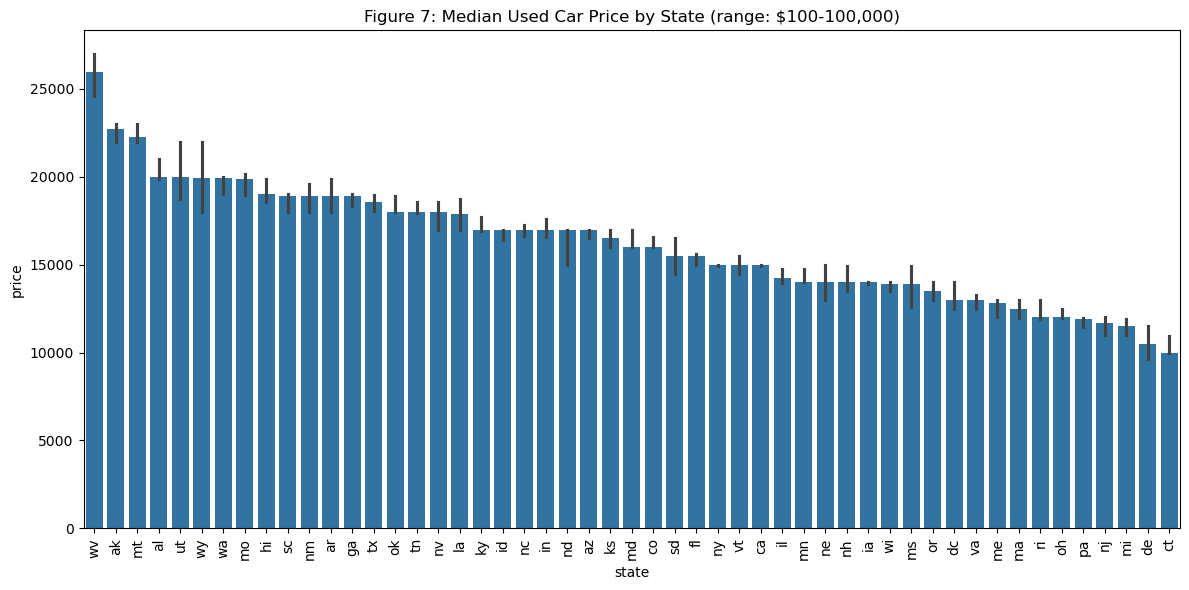

In [100]:
# Figure 7: Used car price distribution by vehicle type

# clean the data to get rid of outliers (<$100 and >$100,000)
df_clean = df[(df['price'] > 100) & (df['price'] < 100000)] 

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_clean,
    x='state',
    y='price',
    estimator='median',
    order=df_clean.groupby('state')['price'].median().sort_values(ascending=False).index
)
plt.title("Figure 7: Median Used Car Price by State (range: $100-100,000)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


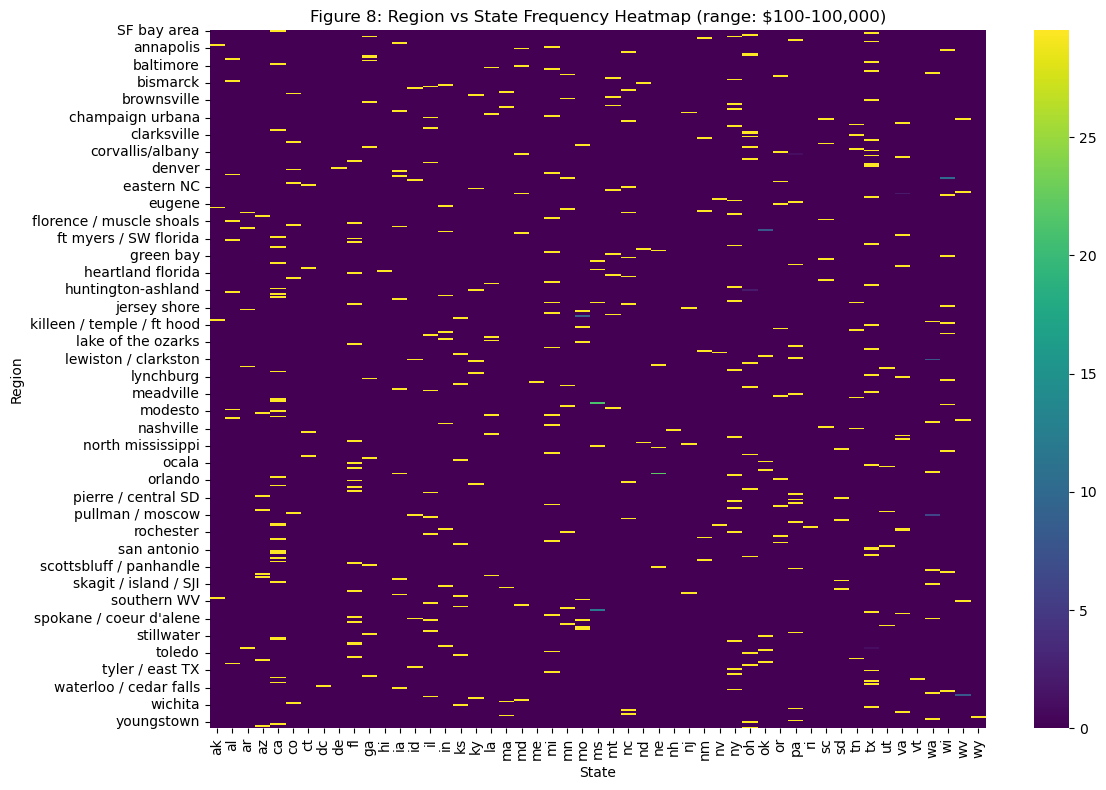

In [111]:
# Figure 8: Vehicle sales of region vs state

# clean the data to get rid of outliers (<$100 and >$100,000)
df_clean = df[(df['price'] > 100) & (df['price'] < 100000)] 

# heatmap of region vs state
region_state_counts = pd.crosstab(df_clean['region'], df_clean['state'])
plt.figure(figsize=(12,8))
sns.heatmap(region_state_counts, cmap='viridis', robust=True)
plt.title("Figure 8: Region vs State Frequency Heatmap (range: $100-100,000)")
plt.xlabel("State")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


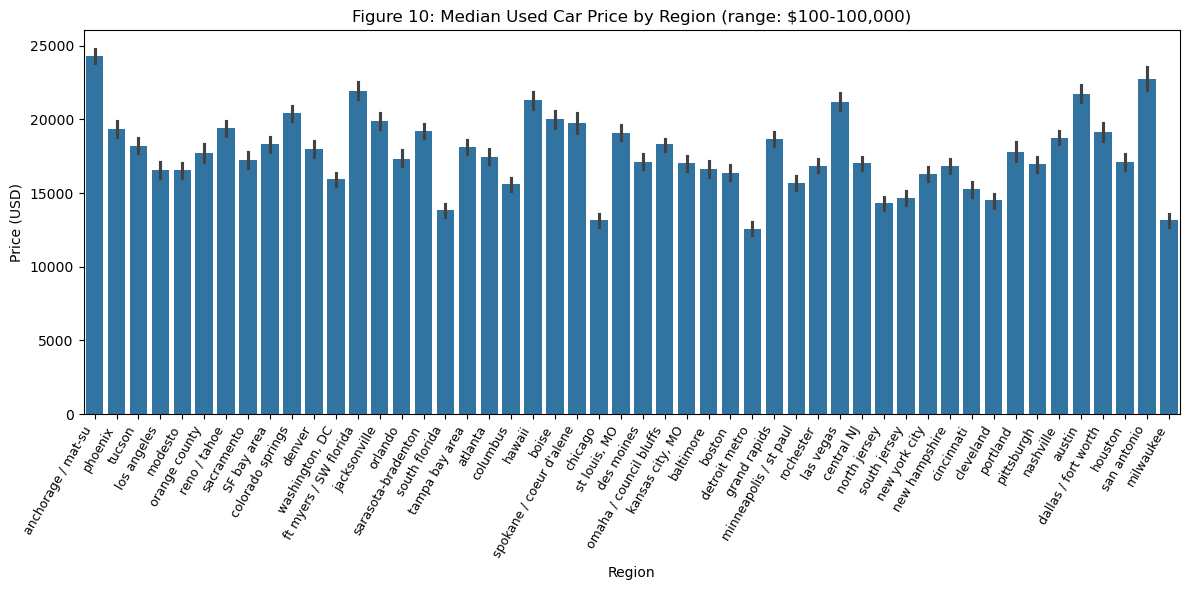

In [7]:
# Figure 10: Used car price over top regions

# clean the data to get rid of outliers (<$100 and >$100,000)
df_clean = df[(df['price'] > 100) & (df['price'] < 100000)] 

# let's first identify the top regions
top_regions = (
    df_clean['region'].value_counts()
    .nlargest(50)              # Adjust number of regions
    .index
)
df_top = df_clean[df_clean['region'].isin(top_regions)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_top,
    x='region',
    y='price'
)
plt.title("Figure 10: Median Used Car Price by Region (range: $100-100,000)")
plt.xlabel("Region")
plt.ylabel("Price (USD)")
# plt.xticks(rotation=90)
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.tight_layout()
plt.show()


In [148]:
# let's get a quick overview of the mileage data to see if we have some outliers that we need to take care of going forward
mileage_summary = df['odometer'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])
print("Mileage Summary (before cleaning):\n")
print(mileage_summary.apply(lambda x: f"{x:,.0f}"))


Mileage Summary (before cleaning):

count       422,480
mean         98,043
std         213,882
min               0
1%                2
5%            6,318
25%          37,704
50%          85,548
75%         133,542
95%         204,000
99%         280,000
max      10,000,000
Name: odometer, dtype: object


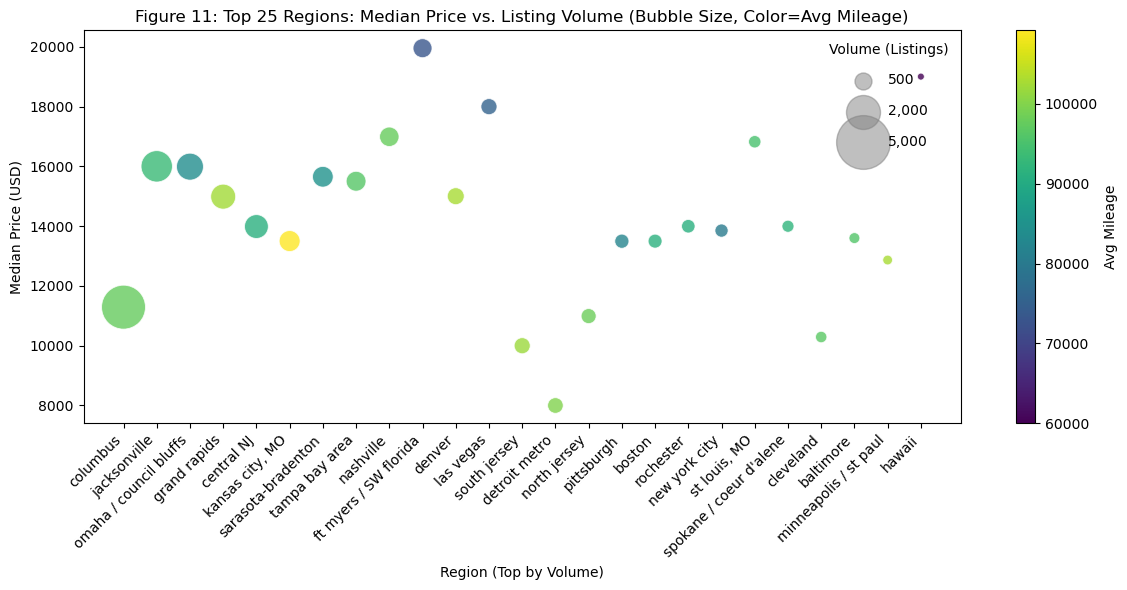

In [161]:
# Figure 11: Top regions volume and sales with an intensity indication on the mileage 

# clean the data to get rid of outliers for sales price (<$100 and >$100,000) and odometer mileage to avoid skewing results
low, high = df['odometer'].quantile([0.01, 0.99])
df_clean = df[
    (df['price'] > 100) & (df['price'] < 100_000) &
    (df['odometer'].between(low, high))
].copy()


# Select top regions by volume and adding average mileage
region_stats = (
    df_clean.groupby('region')
      .agg(median_price=('price', 'median'),
           count=('price', 'count'),
           avg_mileage=('odometer', 'mean'))
      .reset_index()
)
df_top = region_stats.sort_values('count', ascending=False).head(25)

# Create bublle chart that shows most significant regional areas by sales price & volume
plt.figure(figsize=(12,6))
ax = sns.scatterplot(
    data=df_top,
    x='region',
    y='median_price',
    size='count',
    hue='avg_mileage',          # 🎨 color encodes average mileage
    palette='viridis',         # diverging color palette
    sizes=(25, 1000),
    alpha=0.8,
    legend=False
)

# Create our own legend for bubble size 
for s in [500, 2000, 5000]:    # choose representative counts
    ax.scatter([], [], s=(s/df_top['count'].max())*1000, color='gray', alpha=0.5,
                label=f"{s:,}")

ax.legend(
    title="Volume (Listings)",
    labelspacing=1.2, frameon=False,
    loc='upper right', bbox_to_anchor=(1.0, 1)
)

# Labeling for x / y axis
plt.title("Figure 11: Top 25 Regions: Median Price vs. Listing Volume (Bubble Size, Color=Avg Mileage)")
plt.xlabel("Region (Top by Volume)")
plt.ylabel("Median Price (USD)")

# add a clean colorbar for mileage
sm = cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
cbar = plt.colorbar(sm, ax=ax); cbar.set_label("Avg Mileage")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Data Preparation
Perform some cleaning up of the data set so that we can run some models. Data cleaning includes:
- Remove rows that have mostly incomplete information
- Remove vehicles where that have no price.
- Remove vehicle price outliers where price <$100 or >$100,0000

Looking back at the relationship between price and a few of the main features that we plotted provides some insights into linear and non-linear relationships with the features. Let's examine a few of these before we beginning modeling to help guide us in our modeling approach.
Let's look at the relationship between price and some of the main features by graphing them out individually. This will let us know

### Data Plot Insights
- ~80% of the sold vehicles <$30,000. Maximum price is around $100k. Neither are surprising. (Figure 1)
- Gas vehicles are by far the most sold vehicles (84%) followed by other (7.2%), diesel (7.1%), hybrid (1.2%), and electric (0.4%). The natural followup question is  what does “other” mean? (Figure 2)
- There is a very clear linear correlation between price and mileage. We can also see that gas vehicles are the most affordable and hybrid are slightly more expensive than gas. (Figure 3)
- For the value conscious consumer (price <$20k) excellent condition has a significant impact on price. (Figure 4) 
- There is an exponential non-linear relationship between year and price. Value drops off by age quickly (Figure 5.1)
- The price for top brands is almost independent with model year. They retain their value (Figure 5.1)
- Tesla and RAM are the top 2 domestic brands for retaining value (Figure 5.1)
- Furthermore, RAM vehicles not only retain their value but have the 4th highest sales volume (Figure 5.2)
- Ford & Chevrolet are the top selling vehicles and account for > 50% of used car market (volume * price) (Figure 5.2)
- For value conscious consumer (sales price <$20k)— sedans and mini-vans account for > 50% sales volume (Figure 6)
- Between $20-40k price point, pickup trucks account for top overall sales (volume * price) (Figure 6)
- Median used car prices vary significantly by state. Most rural states (WV, AK, MT) have a significantly higher average sales price. Need to dive deeper to understand why. (Figure 7)
- The states with the highest number of high sales volume are: CA, FL, NY, TX. Basically the states with the highest populations as you would expect (Figure 8)
- Regions with the highest median sales prices are: Anchorage (AK), Ft.Myers/SW Florida, Hawaii, Las Vegas, Austin (TX), San Antonio (TX). (Figure 9)
- Top sales volume regions: Columbus (OH), Jacksonville (FL), Omaha (NE) (Figure 10)
- Top median sales price regions and also among the top 10 sales volume are: Ft.Meyers/SW Florida, Las Vegas (NV) (Figure 11)
- Overall there is a strong correlation between median sales price and average vehicle mileage (Figure 11)


In [14]:
## Perform basic data cleaning

vehicles = pd.read_csv('data/vehicles.csv')
vehicles = vehicles.dropna(subset=['odometer'])
vehicles_filtered = vehicles[(vehicles['price'] <= 100000) & (vehicles['odometer'] <= 300000)]
vehicles_clean = vehicles_filtered.dropna(subset=['price'])

# List unique conditions (including NaN)
unique_conditions = vehicles['condition'].unique()
print(unique_conditions)

# Let's get a quick view of the cleaned data set
vehicles_clean.head()

['good' 'excellent' 'fair' nan 'like new' 'new' 'salvage']


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al


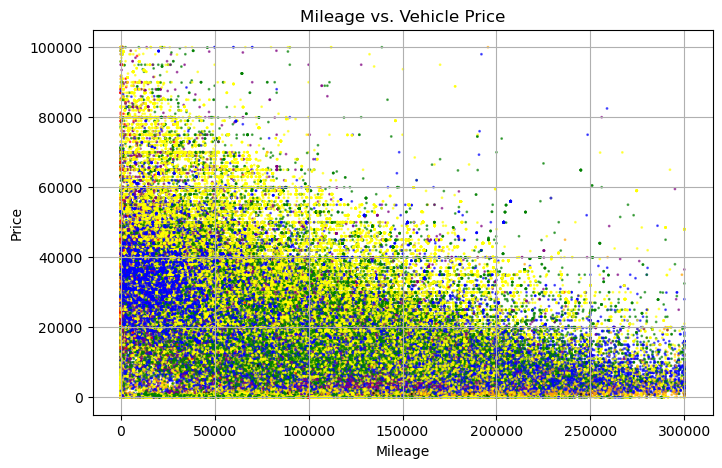

In [15]:
# Define a color map for each condition
condition_colors = {
    'excellent': 'green',
    'good': 'blue',
    'like new': 'purple',
    'fair': 'orange',
    'salvage': 'black',
    'new': 'red'
}

# Map the 'condition' column to colors
colors = vehicles_clean['condition'].map(condition_colors).fillna('yellow')

# Plot Mileage vs Vehicle price
plt.figure(figsize=(8, 5))
plt.scatter(vehicles_clean['odometer'], vehicles_clean['price'], c=colors, s=1, alpha=0.6)
plt.title('Mileage vs. Vehicle Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [16]:
# How many sold vehicles don't have a condition associated with the vehicle sale

df_nocond = df_clean['condition'].isna().sum()
df_vehicles = len(df_clean)
print(df_nocond)
print("Vehciles sold with no reported condition:", df_nocond)
print(f"Percentage of vehicles with no reported condition: {df_nocond / df_vehicles * 100:.2f}%")


149174
Vehciles sold with no reported condition: 149174
Percentage of vehicles with no reported condition: 38.27%


### Let's perform the deeper preprocessing steps
- Drop features that have a lot of empty information or are not significant
- Perform Ordinal Encoding on region
- Perform One-hot encoding on rest of non-numeric features

In [17]:
# Examine columns with most NaNs 
vehicles_clean.isna().sum().sort_values(ascending=False)

size            300331
cylinders       173191
condition       170090
VIN             156658
drive           127383
paint_color     126670
type             90307
manufacturer     16323
title_status      7595
model             4985
fuel              2365
transmission      1665
year              1119
id                   0
odometer             0
region               0
price                0
state                0
dtype: int64

In [18]:
# Let's drop the features that are mostly empty (>100k) or not significant except for condition as there is a significant correlation we observed
print(vehicles_clean.shape)
vehicles_clean = vehicles_clean.drop(columns = ["size", "cylinders", "VIN", "drive", "paint_color", "state", "id"])
print(vehicles_clean.shape)
vehicles_clean.head()

(418817, 18)
(418817, 11)


,region,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,type
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,gas,57923.0,clean,other,pickup
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,gas,71229.0,clean,other,pickup
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,gas,19160.0,clean,other,pickup
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,gas,41124.0,clean,other,pickup
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,gas,128000.0,clean,automatic,truck


In [19]:
# Let's take a look a the feature column data types
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418817 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        418817 non-null  object 
 1   price         418817 non-null  int64  
 2   year          417698 non-null  float64
 3   manufacturer  402494 non-null  object 
 4   model         413832 non-null  object 
 5   condition     248727 non-null  object 
 6   fuel          416452 non-null  object 
 7   odometer      418817 non-null  float64
 8   title_status  411222 non-null  object 
 9   transmission  417152 non-null  object 
 10  type          328510 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 38.3+ MB


In [20]:
## Let's convert our non-numeric objects using one-hot encoding & ordinal encoding

# First let's identify the non-numeric columsn
non_numeric_cols = vehicles_clean.select_dtypes(exclude=["number"]).columns
print("Non-numeric columns:", non_numeric_cols.to_list())

ordinal_cols = ['region', 'manufacturer', 'model']
#onehot_cols = [c for c in non_numeric_cols if c != ordinal_cols]    
onehot_cols = [c for c in non_numeric_cols if c not in ordinal_cols]    # select the one-hot encoded columms



# first fill in missing values
vehicles_clean[ordinal_cols] = vehicles_clean[ordinal_cols].fillna("missing")
vehicles_clean[onehot_cols] = vehicles_clean[onehot_cols].fillna("missing")

# Odrinal encode region
encoder = OrdinalEncoder()
ordinal_encoded = encoder.fit_transform(vehicles_clean[ordinal_cols])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_cols, index=vehicles_clean.index)

# # Select columns and perform one-hot encoding
cat_df = vehicles_clean[onehot_cols].astype("category")
cat_encoded = pd.get_dummies(cat_df, drop_first=False)

# Combine all back togoether into one
num_df = vehicles_clean.select_dtypes(include=['number'])
vehicles_encoded = pd.concat([num_df, ordinal_encoded_df, cat_encoded], axis=1)


vehicles_encoded.head()



Non-numeric columns: ['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'transmission', 'type']


,price,year,odometer,region,manufacturer,model,condition_excellent,condition_fair,condition_good,condition_like new,...,type_hatchback,type_mini-van,type_missing,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,33590,2014.0,57923.0,16.0,14.0,23587.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
28,22590,2010.0,71229.0,16.0,7.0,23981.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
29,39590,2020.0,19160.0,16.0,7.0,24028.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
30,30990,2017.0,41124.0,16.0,40.0,27030.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
31,15000,2013.0,128000.0,16.0,13.0,13989.0,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [35]:
# Let's drop the missing year rows. Only represents a small fraction of our data set
vehicles_encoded = vehicles_encoded.dropna(subset=['year']).reset_index(drop=True)

In [36]:
vehicles_encoded.shape

(417698, 43)

In [39]:
# Check to make sure data set is clean with no NaNs. 

vehicles_encoded.isna().any().any()


False

## Modeling
Time to perform some basic modeling on my 'vehicles_encoded' feature set using 'price' as the target. Let's pursue the following:
- Linear Regression 
- Ridge 
- Lasso
- Random Forest

In [40]:
# Split data into X features and y target
X = vehicles_encoded.drop(columns=['price'])
y = vehicles_encoded['price']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
## Define models + pipeline

cv = KFold(n_splits=3, shuffle=True, random_state=42)   # use KFold for CV
scoring = "neg_mean_squared_error" 

# Build pipeline + parameter grids

lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", LinearRegression())
])

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", Ridge(max_iter=100000, random_state=42))
])
ridge_grid = {
    "reg__alpha": np.logspace(-3, 3, 13)  # 0.001 ... 1000
}

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", Lasso(max_iter=200000, random_state=42))
])
lasso_grid = {
    "reg__alpha": np.logspace(-4, 1, 10)  # 0.0001 ... 10
}

rf_pipe = Pipeline([
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1, bootstrap=True))
])
rf_grid = {
    "rf__n_estimators": [200, 400],
    "rf__max_depth": [8, 12, None],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2],
    "rf__max_features": ["sqrt", 1.0]
}


In [55]:
# Faster alternative Gridsearch CV

cv = KFold(n_splits=3, shuffle=True, random_state=42)   # use KFold for CV
scoring = "neg_root_mean_squared_error"  # better interpretability

ridge_grid = {
    # coarse pass; if best at edge, follow with a tighter pass around it
    "reg__alpha": [1e-3, 3e-3, 1e-2, 3e-2, 0.1, 0.3, 1, 3, 10, 30, 100]
}

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", Lasso(max_iter=50_000, tol=1e-4, random_state=42))  # lower max_iter unless you see warnings
])
lasso_grid = {
    "reg__alpha": [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
}

rf_pipe = Pipeline([
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1, bootstrap=True, oob_score=False))
])

rf_grid = {
    "rf__n_estimators": [200, 400],   # 800 usually not worth the extra time
    "rf__max_depth": [12, None],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2],
    "rf__max_features": ["sqrt"]      # drop 1.0 for speed; add back only if needed
}
# Total combos: 2*2*2*2*1 = 16; with cv=3 -> 48 fits (much tighter)


In [56]:
# Build GridSearch wrappers

gridcv_ridge = GridSearchCV(ridge_pipe, ridge_grid, scoring=scoring, cv=cv, n_jobs=-1, refit=True, verbose=2)
gridcv_lasso = GridSearchCV(lasso_pipe, lasso_grid, scoring=scoring, cv=cv, n_jobs=-1, refit=True, verbose=2)
gridcv_rf = GridSearchCV(rf_pipe, rf_grid, scoring=scoring, cv=cv, n_jobs=-1, refit=True, verbose=2)

In [57]:
# Fit/Train all models

models = {
    "Linear Regression (baseline)": lr_pipe,
    "Ridge (GridSearchCV)": gridcv_ridge,
    "Lasso (GridSearchCV)": gridcv_lasso,
    "Random Forest (GridSearchCV)": gridcv_rf
}

rows = []
best_models = {}

for name, m in models.items():
    print(f"Training {name} ...")
    print(f"\n===== {name} =====")
    start = time.perf_counter()           # ⏱ start timer

    m.fit(X_train, y_train)

    end = time.perf_counter()             # ⏱ stop timer
    elapsed = (end - start) / 60          # convert to minutes

    print(f"✅ {name} completed in {elapsed:.1f} min")

    # CV metric (use best_cv_score for GridSearchCV; else cross-val is inside GS)
    if hasattr(m, "cv_results_"):
        cv_mse = -m.best_score_
        best_params = m.best_params_
        fitted = m.best_estimator_
    else:
        # baseline: compute train CV via manual CV on pipeline if needed (optional)
        best_params = {}
        fitted = m
        # quick proxy: fit on train already done; skip extra CV for baseline simplicity
        # (you can wrap baseline in a GridSearch with empty grid if you want a CV score)
        cv_mse = mean_squared_error(y_train, fitted.predict(X_train))

    y_pred = fitted.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    rows.append({
        "Model": name,
        "CV_RMSE": np.sqrt(cv_mse),
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2,
        "Best_Params": best_params
    })
    best_models[name] = fitted

results_df = pd.DataFrame(rows).sort_values("Test_RMSE").reset_index(drop=True)
results_df

Training Linear Regression (baseline) ...

===== Linear Regression (baseline) =====
✅ Linear Regression (baseline) completed in 0.0 min
Training Ridge (GridSearchCV) ...

===== Ridge (GridSearchCV) =====
Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] END ...................................reg__alpha=0.003; total time=   1.0s
[CV] END ...................................reg__alpha=0.001; total time=   1.0s
[CV] END ...................................reg__alpha=0.003; total time=   1.1s
[CV] END ...................................reg__alpha=0.001; total time=   1.2s
[CV] END ....................................reg__alpha=0.01; total time=   1.2s
[CV] END ...................................reg__alpha=0.001; total time=   1.2s
[CV] END ...................................reg__alpha=0.003; total time=   1.2s
[CV] END ....................................reg__alpha=0.01; total time=   1.3s
[CV] END ....................................reg__alpha=0.01; total time=   0.7s
[CV] E

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.807e+11, tolerance: 4.816e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..................................reg__alpha=0.0001; total time=62.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.752e+11, tolerance: 4.830e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..................................reg__alpha=0.0003; total time=62.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+12, tolerance: 4.833e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..................................reg__alpha=0.0003; total time=62.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.807e+11, tolerance: 4.816e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...................................reg__alpha=0.001; total time=62.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+12, tolerance: 4.833e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..................................reg__alpha=0.0001; total time=62.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.752e+11, tolerance: 4.830e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.752e+11, tolerance: 4.830e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...................................reg__alpha=0.001; total time=62.5min
[CV] END ..................................reg__alpha=0.0001; total time=62.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.807e+11, tolerance: 4.816e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..................................reg__alpha=0.0003; total time=62.6min
[CV] END ....................................reg__alpha=0.03; total time=31.1min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.518e+11, tolerance: 4.833e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................................reg__alpha=0.01; total time=79.3min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.692e+11, tolerance: 4.816e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................................reg__alpha=0.01; total time=79.4min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.506e+11, tolerance: 4.830e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................................reg__alpha=0.01; total time=79.5min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.752e+11, tolerance: 4.830e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...................................reg__alpha=0.003; total time=79.9min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+12, tolerance: 4.833e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...................................reg__alpha=0.001; total time=80.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.807e+11, tolerance: 4.816e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...................................reg__alpha=0.003; total time=80.0min


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.518e+11, tolerance: 4.833e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...................................reg__alpha=0.003; total time=80.0min
[CV] END ....................................reg__alpha=0.03; total time=51.6min
[CV] END .....................................reg__alpha=0.1; total time=36.0min
[CV] END .....................................reg__alpha=0.1; total time=36.0min
[CV] END .....................................reg__alpha=0.1; total time=35.8min
[CV] END ....................................reg__alpha=0.03; total time=39.4min
✅ Lasso (GridSearchCV) completed in 106.4 min
Training Random Forest (GridSearchCV) ...

===== Random Forest (GridSearchCV) =====
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END rf__max_depth=12, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=  34.7s
[CV] END rf__max_depth=12, rf__max_features=sqrt, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200; total time=  46.0s
[CV] END rf__max_depth=12, rf__max_features

,Model,CV_RMSE,Test_RMSE,Test_R2,Best_Params
0,Random Forest (GridSearchCV),83.886325,6709.980629,0.794371,"{'rf__max_depth': None, 'rf__max_features': 's..."
1,Linear Regression (baseline),11601.921026,11656.537630,0.379445,{}
2,Ridge (GridSearchCV),107.718738,11656.549372,0.379443,{'reg__alpha': 30}
3,Lasso (GridSearchCV),107.718736,11656.549615,0.379443,{'reg__alpha': 0.1}


## Model Evaluation

RF Test RMSE: 6709.9806292145395
RF Test R²  : 0.7943711939464915
RF best params: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
RF CV (best_score_): -7036.915463015731


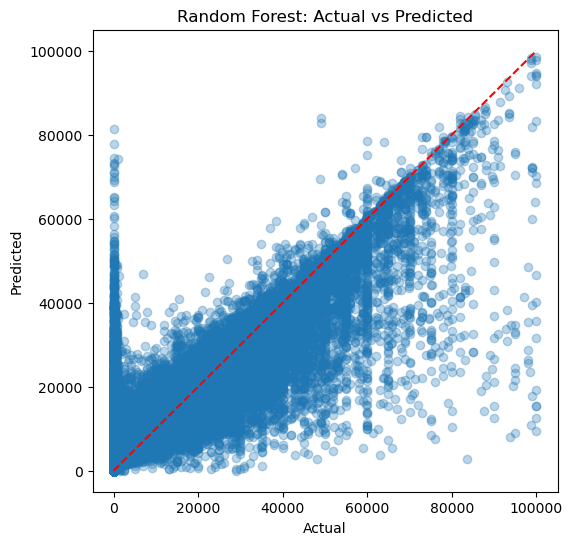

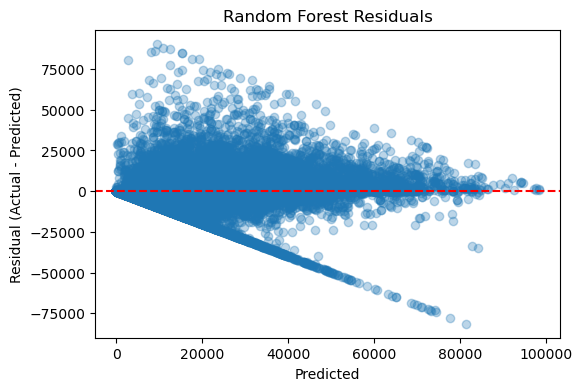


Top 15 RF features:
odometer                  0.241570
year                      0.197797
model                     0.136967
region                    0.091797
manufacturer              0.071080
fuel_diesel               0.034212
transmission_other        0.027004
type_pickup               0.026739
fuel_gas                  0.025809
type_sedan                0.015678
type_truck                0.015209
condition_good            0.013318
transmission_automatic    0.013250
condition_missing         0.010339
type_missing              0.008700
dtype: float64


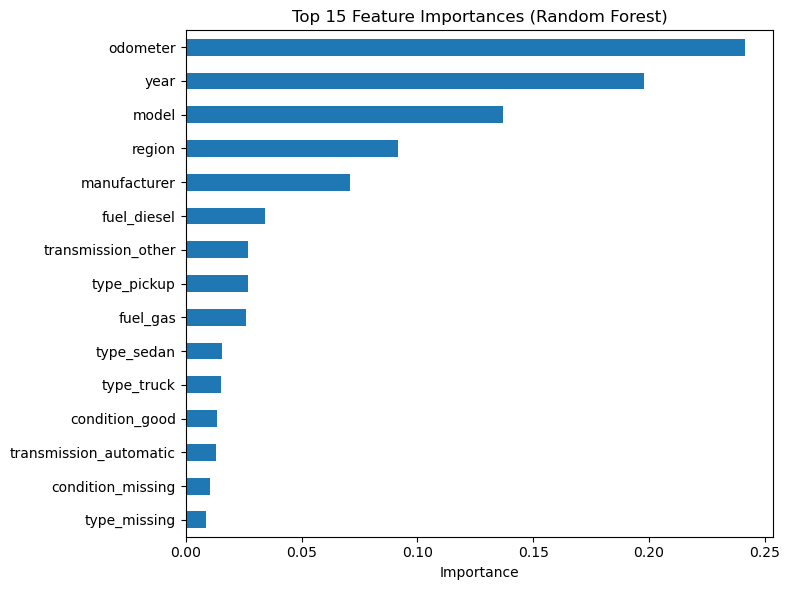

In [ ]:
## Let's look at the results

# 1) Get your trained GridSearchCV object
rf_gs = models["Random Forest (GridSearchCV)"]   # <- this is the fitted GridSearchCV

# 2) Predict on test
y_pred = rf_gs.best_estimator_.predict(X_test)   # (rf_gs.predict(X_test) also works)

# 3) Quick metrics (optional)
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)
print("RF Test RMSE:", rmse)
print("RF Test R²  :", r2)
print("RF best params:", rf_gs.best_params_)
print("RF CV (best_score_):", rf_gs.best_score_)

# 4) Actual vs Predicted plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
mn, mx = y_test.min(), y_test.max()
plt.plot([mn, mx], [mn, mx], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# 5) Residuals plot
resid = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, resid, alpha=0.3)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Random Forest Residuals")
plt.show()

# 6) Feature importances (works whether you used a Pipeline or not)
est = rf_gs.best_estimator_
rf  = getattr(est, "named_steps", {}).get("rf", est)  # Pipeline('rf') or plain RF

importances = None
if hasattr(rf, "feature_importances_"):
    importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nTop 15 RF features:")
    print(importances.head(15))

    # Plot top 15
    plt.figure(figsize=(8,6))
    importances.head(15).sort_values().plot(kind="barh")
    plt.title("Top 15 Feature Importances (Random Forest)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
else:
    print("This estimator doesn’t expose `feature_importances_`. Use permutation importance instead.")


## Resuls & Evaluation

### Model Performance
Among the four models evaluated — Linear Regression, Ridge, Lasso, and Random Forest — the ensemble model delivered a clear performance advantage.
The Random Forest explains roughly 79% of the variance in the target variable and generalizes well between CV (−7037 RMSE) and test (6710 RMSE), indicating a balanced bias–variance tradeoff.

### Diagnostic Visuals
#### Actual vs Predicted Scatter
The scatter plot shows a dense diagonal pattern, demonstrating that the Random Forest model tracks well with actual outcomes across most of the value range.
However, mild compression appears in the upper range (> 60,000), where the model slightly underpredicts high-value observations—a common behavior when few training examples exist in that region.

#### Residual Distribution
Residuals are centered around zero with no severe skew, but show heteroscedasticity: larger variance at higher predicted values.
This suggests that prediction uncertainty grows for higher-valued vehicles, again likely due to data imbalance rather than model bias.

### Feature Performance
The Random Forest feature importances align strongly with domain expectations:

| Rank  | Feature                            | Importance | Interpretation                                               |
| ----- | ---------------------------------- | ---------- | ------------------------------------------------------------ |
| 1     | **odometer**                       | 0.24       | Usage/mileage is the single most influential factor in value |
| 2     | **year**                           | 0.20       | Newer vehicles retain more value                             |
| 3     | **model**                          | 0.14       | Vehicle model contributes distinct value signals             |
| 4     | **region**                         | 0.09       | Geographic pricing differences affect valuations             |
| 5     | **manufacturer**                   | 0.07       | Brand reputation and reliability premium                     |
| 6-10  | fuel type, transmission, body type | 0.02–0.03  | Reflect drivetrain and configuration effects                 |
| 11-15 | condition, type, missing flags     | < 0.02     | Marginal but helpful refinements                             |

The dominance of odometer and year confirms the expected relationship between vehicle age/usage and market value.
The strong contribution from model and region suggests the model successfully captures localized and categorical pricing variations.

### Overall Assessment
The Random Forest captures complex, non-linear dependencies that linear models miss, providing a 40-point R² improvement.
Its residuals show no systematic bias, only natural variance growth with value scale.
Feature importance analysis enhances interpretability and validates model behavior against domain intuition.
Further performance gains may be achievable through gradient boosting (e.g., HistGradientBoostingRegressor or XGBoost) or data balancing for high-value ranges.

### Conclusion
The Random Forest model delivers robust predictive accuracy and interpretable results for estimating vehicle value.
The model’s insights — particularly the prominence of odometer, year, and model — mirror real-world market dynamics, indicating that the learned patterns are meaningful and reliable.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.